In [1]:
import json
import pandas as pd

with open('../data/data_SurahAyat.json', encoding="utf8") as f:
    surat = json.load(f)

with open('../data/data_tafsir.json', encoding="utf8") as f:
    tafsir = json.load(f)

# with open('data/All_surah.txt', encoding="utf8") as surah_file:
#     all_surah = json.load(surah_file)

In [5]:
surat['intents'][0]

{'tag': 'salam',
 'patterns': ['halo', 'hai', 'hi', 'hay'],
 'responses': ['halo, ada yang bisa saya bantu?',
  'hai, ada yang ingin kamu tanyakan?']}

In [2]:
pola_teks=[]
intents = []

for intent in surat['intents']:
    for pattern in intent['patterns']:
        pola_teks.append(pattern)
        intents.append(intent['tag'])

for intent in tafsir['intents']:
    for pattern in intent['patterns']:
        pola_teks.append(pattern)
        intents.append(intent['tag'])

df = pd.DataFrame({'pola_teks': pola_teks,
                    'intents': intents})

len(set(intents))
df

,pola_teks,intents
0,halo,salam
1,hai,salam
2,hi,salam
3,hay,salam
4,qs alfatihah ayat,fatihah
...,...,...
2152,tafsir qs an nas ayat,nas_tafsir
2153,tafsir qs annas ayat,nas_tafsir
2154,tafsir an nas ayat,nas_tafsir
2155,tafsir annas ayat,nas_tafsir


In [81]:
for i in range(len(df.pola_teks)):
    df.pola_teks[i] = df.pola_teks[i].split()

df

,pola_teks,intents
0,[halo],salam
1,[hai],salam
2,[hi],salam
3,[hay],salam
4,"[qs, alfatihah, ayat]",fatihah
...,...,...
2152,"[tafsir, qs, an, nas, ayat]",nas_tafsir
2153,"[tafsir, qs, annas, ayat]",nas_tafsir
2154,"[tafsir, an, nas, ayat]",nas_tafsir
2155,"[tafsir, annas, ayat]",nas_tafsir


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

tfidfVectorizer = TfidfVectorizer(norm=None, smooth_idf=True) # Ini untuk TFIDF
countVectorizer = CountVectorizer() # Ini untuk ngeliat tiap frequency term 
tfidf = tfidfVectorizer.fit_transform(pola_teks)
count = countVectorizer.fit_transform(pola_teks)
tfidf[1898].toarray()
tfidfVectorizer.vocabulary_

{'halo': 269,
 'hai': 266,
 'hi': 277,
 'hay': 276,
 'qs': 383,
 'alfatihah': 50,
 'ayat': 218,
 'al': 12,
 'fatihah': 247,
 'surat': 410,
 'alfatiha': 49,
 'fatiha': 246,
 'albaqarah': 39,
 'baqarah': 229,
 'albaqara': 38,
 'baqara': 228,
 'baqoro': 230,
 'aliimran': 80,
 'ali': 79,
 'imran': 288,
 'imron': 289,
 'annisa': 171,
 'an': 154,
 'nisa': 365,
 'almaidah': 112,
 'maidah': 324,
 'almaida': 111,
 'maida': 323,
 'alanam': 25,
 'anam': 155,
 'alaraf': 32,
 'araf': 174,
 'alanfal': 28,
 'anfal': 158,
 'attaubah': 215,
 'at': 202,
 'taubah': 432,
 'attauba': 214,
 'tauba': 431,
 'tawbah': 434,
 'tawba': 433,
 'yunus': 444,
 'surah': 409,
 'alhud': 74,
 'hud': 280,
 'alhut': 78,
 'hut': 284,
 'yusuf': 445,
 'arrad': 175,
 'ar': 173,
 'rad': 386,
 'arrat': 177,
 'rat': 388,
 'ibrahim': 285,
 'alhijr': 73,
 'hijr': 279,
 'alhijir': 72,
 'hijir': 278,
 'annahl': 163,
 'nahl': 355,
 'annahal': 162,
 'nahal': 354,
 'alisra': 93,
 'isra': 300,
 'alisro': 94,
 'isro': 301,
 'alkahfi': 103

In [4]:
D_idx = []
for i in range(2157):
    D_idx.append('D' + str(i+1))

df_tfidf = pd.DataFrame(data=tfidf.toarray(), columns=tfidfVectorizer.vocabulary_, index=D_idx)

df_tfidf.T

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D2148,D2149,D2150,D2151,D2152,D2153,D2154,D2155,D2156,D2157
halo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hai,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hi,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
hay,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
qs,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fajar,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
insirah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
alinsirah,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
syarh,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Ini untuk mengubah label sesuai indeksnya
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
label = le.fit_transform(df.intents) 
# print(len(le.inverse_transform(label)))
label

array([282, 282, 282, ..., 218, 218, 218])

In [6]:
x = tfidf
y = label

y.shape

(2157,)

In [7]:
#Pembagian data train dan test
from sklearn.model_selection import train_test_split

teks_train, teks_test, label_train, label_test = train_test_split(x,y, test_size=.20)

teks_train.shape
# teks_test.shape


(1725, 452)

In [8]:
# Ini untuk nge define MLPnya dan Training
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(64), activation='relu', solver='sgd', batch_size=15, verbose=True ,learning_rate_init=0.007) #relu ini hanya untuk hidden layer
mlp.out_activation = 'softmax' # untuk mendefinisikan bahwa di layer output kita mau pake softmax

mlp.fit(teks_train, label_train)

Iteration 1, loss = 5.81217826
Iteration 2, loss = 5.63829685
Iteration 3, loss = 5.41732557
Iteration 4, loss = 5.11115273
Iteration 5, loss = 4.70518075
Iteration 6, loss = 4.22146000
Iteration 7, loss = 3.70192522
Iteration 8, loss = 3.18588136
Iteration 9, loss = 2.70158031
Iteration 10, loss = 2.27354569
Iteration 11, loss = 1.88634697
Iteration 12, loss = 1.55269436
Iteration 13, loss = 1.26420971
Iteration 14, loss = 1.02250791
Iteration 15, loss = 0.82111560
Iteration 16, loss = 0.66059419
Iteration 17, loss = 0.53830572
Iteration 18, loss = 0.43540153
Iteration 19, loss = 0.35792077
Iteration 20, loss = 0.29611400
Iteration 21, loss = 0.24775010
Iteration 22, loss = 0.20970123
Iteration 23, loss = 0.18067916
Iteration 24, loss = 0.15727430
Iteration 25, loss = 0.13753282
Iteration 26, loss = 0.12257389
Iteration 27, loss = 0.10990328
Iteration 28, loss = 0.09958879
Iteration 29, loss = 0.09042041
Iteration 30, loss = 0.08284098
Iteration 31, loss = 0.07666132
Iteration 32, los

MLPClassifier(batch_size=15, hidden_layer_sizes=64, learning_rate_init=0.007,
              solver='sgd', verbose=True)

In [9]:
#Pengujian
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sn


predict_test = mlp.predict(teks_test)
acc_test = accuracy_score(label_test, predict_test)
print(f"Testing accuracy : {acc_test}")


Testing accuracy : 0.8032407407407407


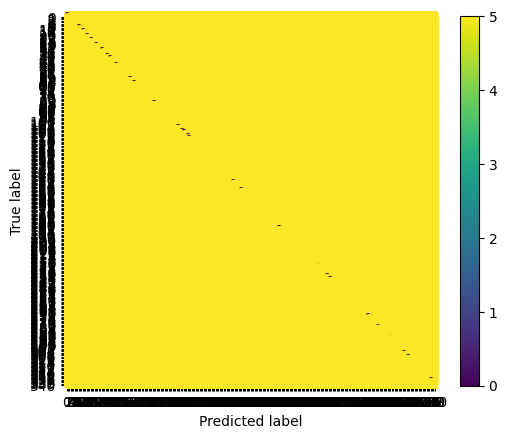

<Figure size 1700x500 with 0 Axes>

In [14]:


# print(len(mlp.coefs_[1][0]))
# mlp.coefs_[1][63]


# cm = confusion_matrix(label_test,predict_test)
# sn.heatmap(cm, annot=True, cmap='Blues')

disp = ConfusionMatrixDisplay.from_predictions(label_test, predict_test)
plt.figure(figsize=(17,5))
plt.show()


In [10]:
import numpy as np

cr = classification_report(label_test, predict_test, labels=np.arange(0,len(le.classes_),1), target_names=le.classes_)

print(cr)

                    precision    recall  f1-score   support

             abasa       0.00      0.00      0.00         0
       abasa_surah       1.00      1.00      1.00         1
      abasa_tafsir       0.00      0.00      0.00         0
            adiyat       0.00      0.00      0.00         1
      adiyat_surah       1.00      1.00      1.00         1
     adiyat_tafsir       1.00      1.00      1.00         2
             ahqaf       0.50      1.00      0.67         1
       ahqaf_surah       1.00      1.00      1.00         1
      ahqaf_tafsir       1.00      1.00      1.00         1
             ahzab       0.00      0.00      0.00         0
       ahzab_surah       1.00      1.00      1.00         2
      ahzab_tafsir       1.00      1.00      1.00         2
               ala       0.00      0.00      0.00         0
         ala_surah       0.67      1.00      0.80         2
        ala_tafsir       1.00      1.00      1.00         1
              alaq       0.00      0.00

c:\Users\Ripki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ripki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Ripki\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [77]:
# Nge save model MLPnya
import pickle

# filename = "model_mlp.pickle"

# pickle.dump(mlp, open(filename, "wb"))
#filename.close()

In [78]:
# Nge save label yang sudah kita fit(ubah sesuai indeks) tadi

# le_filename = open("label_mlp.pickle", "wb")
# pickle.dump(le, le_filename)
# le_filename.close()


In [60]:
# save tfidf vocabularynya

# import pickle
# pickle.dump(tfidfVectorizer.vocabulary_, open("tfidf.pkl", "wb"))